# Titanic - Naive Bayes

## Datos de entrenamiento

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# Leer el archivo CSV
df = pd.read_csv("titanic.csv")

# Mostrar las primeras filas del DataFrame
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
count = df['Survived'].value_counts()
print("count", count)

count_survived_0 = count[0]
count_survived_1 = count[1]

total_count = count_survived_0 + count_survived_1

print("count_survived_0", count_survived_0)
print("count_survived_1", count_survived_1)
print("total_count", total_count)


p_survived_0 = count_survived_0 / total_count
p_survived_1 = count_survived_1 / total_count

print("P(survived = 0 )", p_survived_0)
print("P(survived = 1 )", p_survived_1)


count Survived
0    549
1    342
Name: count, dtype: int64
count_survived_0 549
count_survived_1 342
total_count 891
P(survived = 0 ) 0.6161616161616161
P(survived = 1 ) 0.3838383838383838


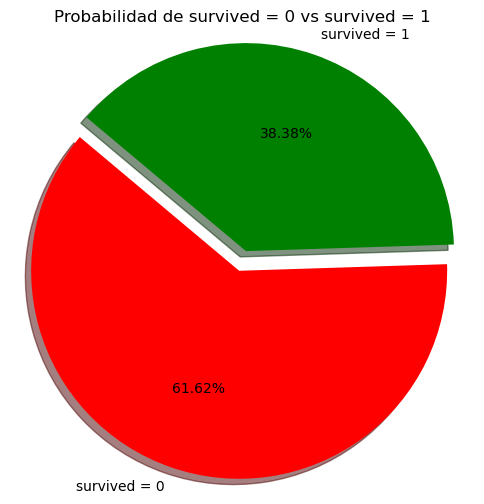

In [30]:
# Crear gráfico
labels = ['survived = 0', 'survived = 1']
sizes = [p_survived_0, p_survived_1]
colors = ['red', 'green']
explode = (0.05, 0.05) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Probabilidad de survived = 0 vs survived = 1')
plt.axis('equal')  
plt.show()

## Datos de prueba

In [62]:
#Input (Datos de  prueba)
pClass_input = 2
sex_input = "male"
edad_input = 35
sibSp_input = 2

In [64]:
def calculate_conditional_probabilities(df: pd.DataFrame, property_name: str, property_value: any) -> tuple:
    """
    Calculate conditional probabilities P(property_value | survived=0) and P(property_value | survived=1)
    
    Args:
        df (pd.DataFrame): DataFrame containing the dataset
        property_name (str): Name of the property column (e.g., 'Pclass', 'Age')
        property_value (any): Value of the property to filter by
        
    Returns:
        tuple: (P(property_value | survived=0), P(property_value | survived=1))
    """
    # Filter dataframe by the property value
    df_filtered = df[df[property_name] == property_value]
    
    # Count survivors and non-survivors in the filtered data
    survival_counts = df_filtered['Survived'].value_counts()
    
    # Handle cases where all passengers survived or all died
    non_survivors = survival_counts.get(0, 0)
    survivors = survival_counts.get(1, 0)
    
    # Calculate total count
    total_count = non_survivors + survivors
    
    # Calculate conditional probabilities
    p_property_given_survived_0 = non_survivors / total_count if total_count > 0 else 0
    p_property_given_survived_1 = survivors / total_count if total_count > 0 else 0
    
    # Print results for debugging/information
    print(f"Count of filtered records: {survival_counts}")
    print(f"Non-survivors with {property_name}={property_value}: {non_survivors}")
    print(f"Survivors with {property_name}={property_value}: {survivors}")
    print(f"Total count with {property_name}={property_value}: {total_count}")
    print(f"P({property_name}={property_value} | survived=0): {p_property_given_survived_0}")
    print(f"P({property_name}={property_value} | survived=1): {p_property_given_survived_1}")
    
    return p_property_given_survived_0, p_property_given_survived_1

In [66]:
def create_survival_probability_pie_chart(
    p_property_survived_0: float, 
    p_property_survived_1: float, 
    property_name: str = 'General',
    property_value: any = None,
    figsize: tuple = (6, 6)
) -> None:
    """
    Creates a pie chart showing the probability distribution of survival outcomes for a given property.
    
    Args:
        p_property_survived_0 (float): Probability of not surviving given the property value
        p_property_survived_1 (float): Probability of surviving given the property value
        property_name (str, optional): Name of the property being analyzed. Defaults to 'General'.
        property_value (any, optional): Value of the property being analyzed. Defaults to None.
        figsize (tuple, optional): Figure size as (width, height). Defaults to (6, 6).
    
    Returns:
        None: Displays the pie chart using plt.show()
    """
    import matplotlib.pyplot as plt
    
    # Chart data
    labels = ['survived = 0', 'survived = 1']
    sizes = [p_property_survived_0, p_property_survived_1]
    colors = ['red', 'green']
    explode = (0.05, 0.05)  # Slight explosion for both segments
    
    # Create the pie chart
    plt.figure(figsize=figsize)
    plt.pie(
        sizes, 
        labels=labels, 
        colors=colors, 
        explode=explode, 
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=140
    )
    
    # Create title based on property information
    if property_value is not None:
        title = f'Probabilidad de supervivencia dado {property_name} = {property_value}'
    else:
        title = f'Probabilidad de supervivencia ({property_name})'
    
    # Add title and ensure the pie is drawn as a circle
    plt.title(title)
    plt.axis('equal')
    
    # Display the chart
    plt.show()

Count of filtered records: Survived
0    97
1    87
Name: count, dtype: int64
Non-survivors with Pclass=2: 97
Survivors with Pclass=2: 87
Total count with Pclass=2: 184
P(Pclass=2 | survived=0): 0.5271739130434783
P(Pclass=2 | survived=1): 0.47282608695652173


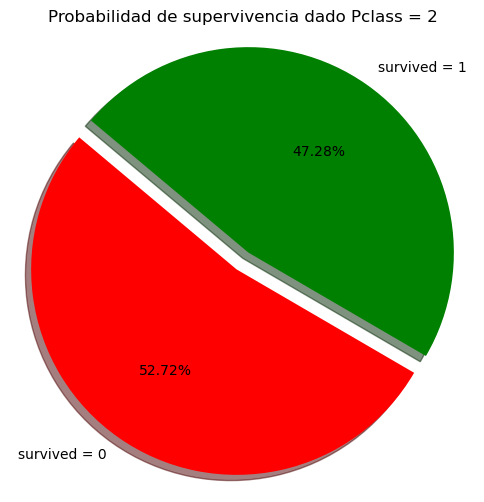

In [70]:
#Pclass
p_pclass_survived_0, p_pclass_survived_1 = calculate_conditional_probabilities(df, 'Pclass', pClass_input)
create_survival_probability_pie_chart(
    p_pclass_survived_0, 
    p_pclass_survived_1, 
    property_name='Pclass', 
    property_value=pClass_input)